<a href="https://colab.research.google.com/github/Isanjalee/fyp/blob/rideShare_dataset/rideShare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Ride Price Prediction Model**

## **Step 1: Data Preprocessing**


In [2]:
import pandas as pd

# Load the data
file_path = '/content/drive/MyDrive/FYP - DATASET/rideshare_kaggle.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()








<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [3]:
# Handle missing values
data.dropna(inplace=True)

# Convert timestamps to datetime objects
data['timestamp'] = pd.to_datetime(data['timestamp'])

## **Step 2: Feature Selection and Engineering**

In [4]:
# Select relevant features
selected_features = ['hour', 'day', 'distance', 'temperature']

# Create feature matrix (X) and target variable (y)
X = data[selected_features]
y = data['price']

Visualization:

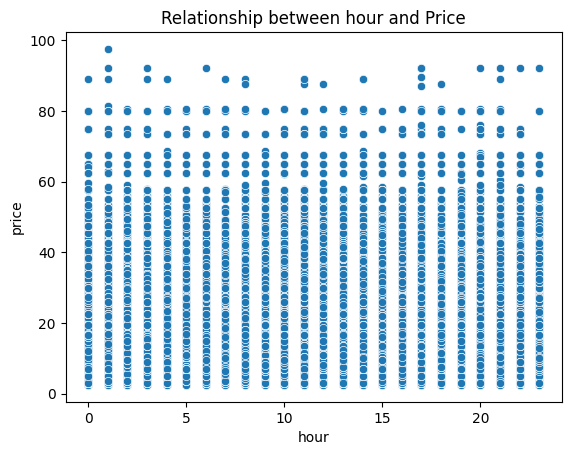

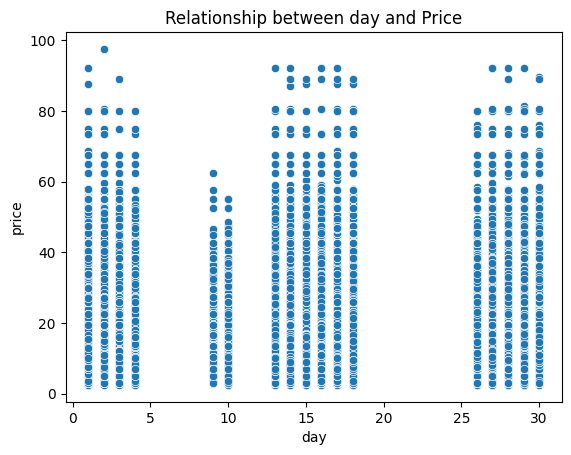

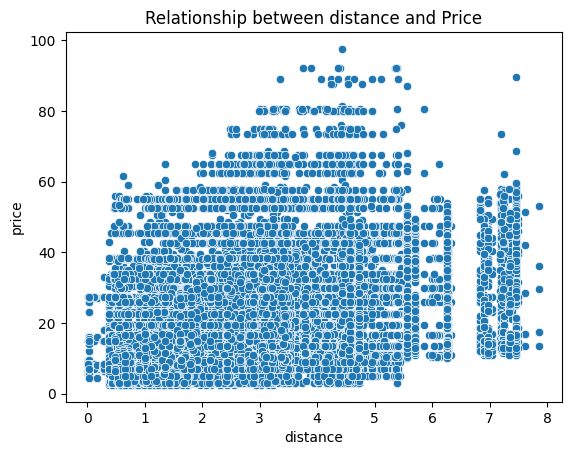

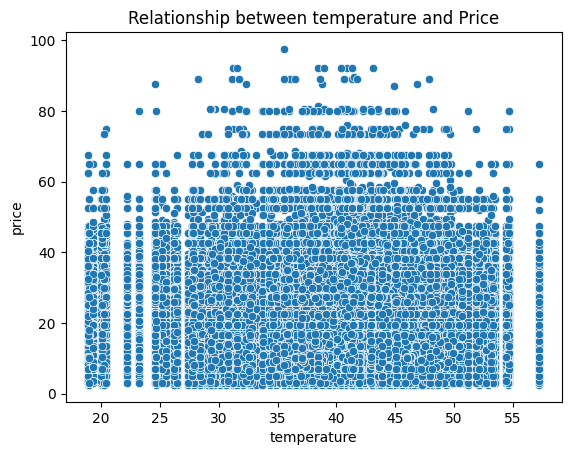

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the relationship for continuous features
for feature in selected_features:
    sns.scatterplot(x=data[feature], y=data['price'])
    plt.title(f'Relationship between {feature} and Price')
    plt.show()


Correlation Matrix:

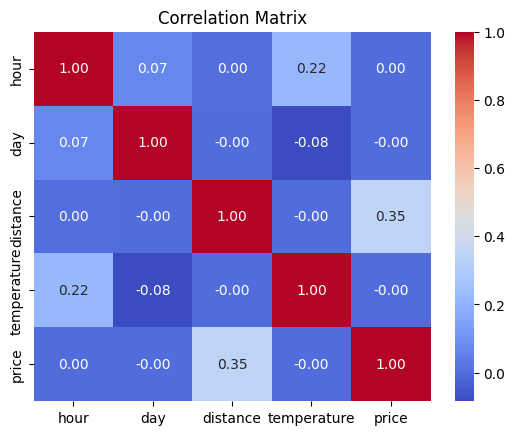

In [8]:
correlation_matrix = data[selected_features + ['price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


## **Step 3: Data Splitting**

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
# Print the shapes of the sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optionally, print the first few rows of each set
print("\nFirst few rows of X_train:")
print(X_train.head())


X_train shape: (510380, 4)
X_test shape: (127596, 4)
y_train shape: (510380,)
y_test shape: (127596,)

First few rows of X_train:
        hour  day  distance  temperature
141913     9    2      2.22        38.54
207434    21   14      3.22        42.91
524847    23    9      1.63        30.26
629294     2   27      0.61        43.58
5225       8    2      3.42        38.95


Feature Importance in Tree-Based Models:

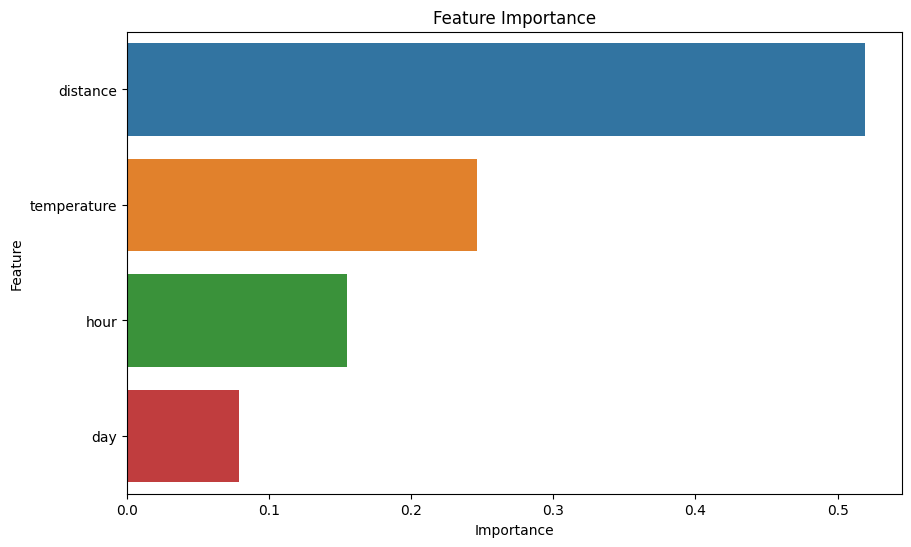

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()


## **Step 4: Model Training**

In [13]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Make Predictions:

In [17]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)


 Evaluate Model Performance:

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 76.771394408801
Mean Absolute Error: 7.106282224999249
R-squared: 0.11939639519125589


Visualize Predictions vs. Actual Values:

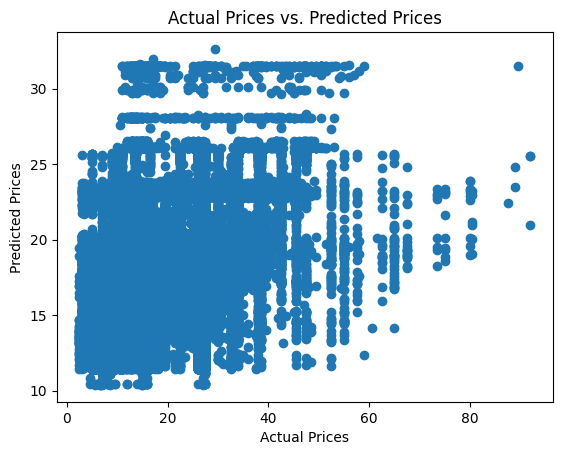

In [19]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

Explore Coefficients and Intercept:

In [20]:
# Access the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

print(f'Coefficients: {coefficients}')
print(f'Intercept: {intercept}')

Coefficients: [-8.27494054e-04 -3.74000790e-04  2.83179676e+00  2.25232687e-03]
Intercept: 10.27586232216765


Permutation Importance:

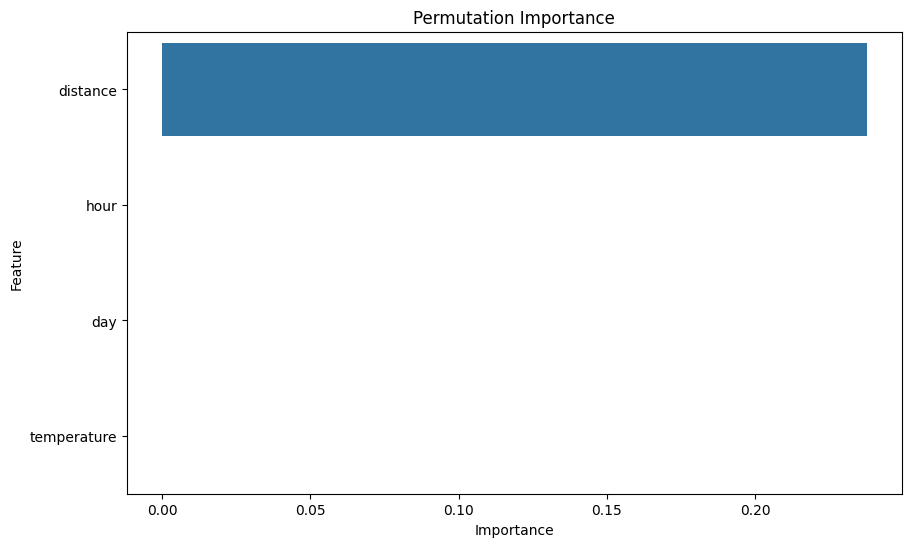

In [14]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Create a DataFrame to display permutation importances
perm_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': perm_importance.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Plot the permutation importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
plt.title('Permutation Importance')
plt.show()


## **Step 5: Model Evaluation**

In [15]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 76.771394408801


        Actual  Predicted
526491     7.0  23.139937
506474    10.5  18.290723
139551     7.0  13.461000
235222    15.5  12.967029
140436    16.5  13.514297
...        ...        ...
87288     33.0  17.881804
111342     7.0  13.229005
201635    18.0  14.589386
320604    10.0  15.919469
666972    11.0  13.546501

[127596 rows x 2 columns]


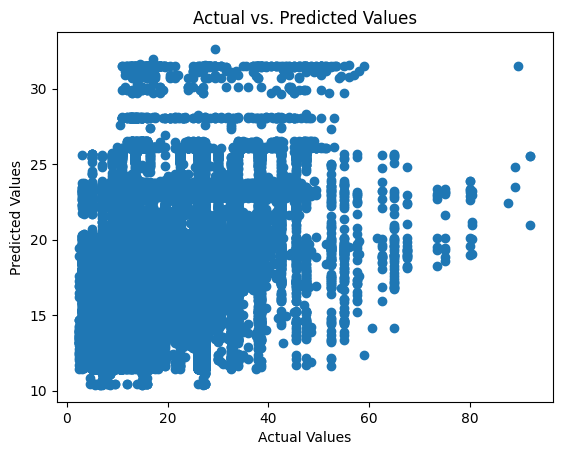

In [21]:
# Print the predictions and actual values side by side
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(results)

# Visualize the predicted vs. actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


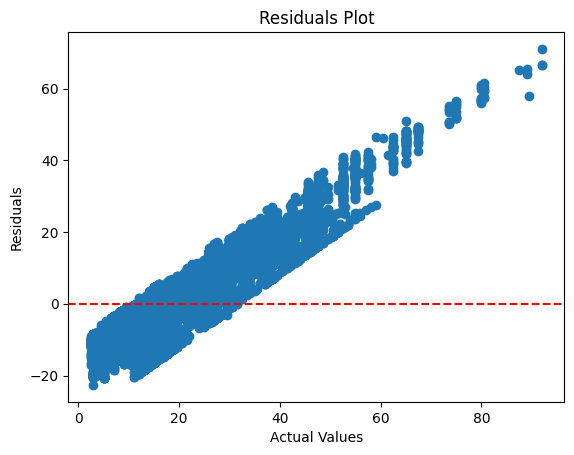

In [22]:
# Calculate residuals
residuals = y_test - predictions

# Visualize residuals
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()